In [115]:
# 데이터프레임 처리
import pandas as pd
import numpy as np

In [116]:
# 그래프
import matplotlib.pyplot as plt

In [117]:
# 폰트 및 호환
import matplotlib.font_manager as fm
import platform
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
    
elif system_name == 'Darwin': # Mac OS
    print('Mac OS')
    plt.rc('font', family='AppleGothic')
    
elif system_name == 'Linux': # Linux
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
    
else:
    print("Not support")

Windows OS


In [118]:
df=pd.read_csv('./Data/' + 'daegu_utf8.csv', encoding='utf-8')
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41450 non-null  object 
 1   지점      41450 non-null  int64  
 2   평균기온    41450 non-null  float64
 3   최저기온    41450 non-null  float64
 4   최고기온    41450 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [120]:
df.isna().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [121]:
df['날짜'] = pd.to_datetime(df['날짜'])
df['날짜']

0       1909-01-01
1       1909-01-02
2       1909-01-03
3       1909-01-04
4       1909-01-05
           ...    
41445   2022-06-26
41446   2022-06-27
41447   2022-06-28
41448   2022-06-29
41449   2022-06-30
Name: 날짜, Length: 41450, dtype: datetime64[ns]

In [122]:
df.isna().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [123]:
# ------------------------------------------

In [132]:
start_year = int(input('시작 연도 입력 : '))
last_year = int(input('마지막 연도 입력 : '))
user_month = int(input('달 입력 : '))


시작 연도 입력 : 2001
마지막 연도 입력 : 2021
달 입력 : 8


In [133]:
high_temp=[]
low_temp=[]
x_year=[]

In [134]:
# year_df=df[ (df.날짜.dt.year>=start_year) & (df.날짜.dt.year<=start_year) ]
# month_df = df[ df.날짜.dt.month == user_month ]

In [135]:
year_df=df.날짜.dt.year
month_df=df.날짜.dt.month


In [136]:
# 조건에 맞는 데이터프레임 생성
cond_df=df[(year_df>=start_year)&(year_df<=last_year)&(month_df==user_month)]

In [137]:
for i in range(start_year, last_year+1):
    max_temp_mean=round(cond_df[ cond_df.날짜.dt.year == i]['최고기온'].mean(), 1)
    min_temp_mean=round(cond_df[ cond_df.날짜.dt.year == i]['최저기온'].mean(), 1)
    
    high_temp.append(max_temp_mean)
    low_temp.append(min_temp_mean)
    x_year.append(i)

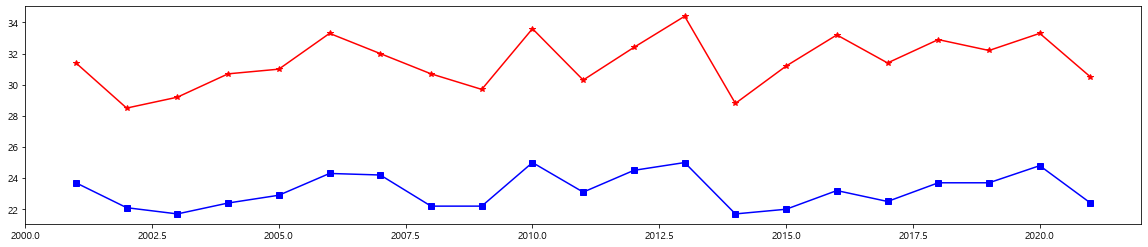

In [138]:
plt.figure(figsize=(20,4))
plt.plot(x_year, high_temp, 'red', marker='*', label='최고기온')
plt.plot(x_year, low_temp, 'blue', marker='s', label='최저기온')

In [141]:
print(f'{start_year}년부터 {last_year}까지 {user_month}월의 기온 변화')
print(f'{user_month}월 최저기온 평균 : \n{low_temp}')
print(f'{user_month}월 최고기온 평균 : \n{high_temp}')

2001년부터 2021까지 8월의 기온 변화
8월 최저기온 평균 : 
[23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4]
8월 최고기온 평균 : 
[31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5]


In [131]:
# 데이터프레임.groupby(그룹이되는컬럼)[계산하고 싶은 컬럼].집계함수()
# df.groupby(df['날짜'])['최고기온'].mean()